<a href="https://colab.research.google.com/github/navixlee/try/blob/master/%E6%98%8E%E6%96%B0%E7%A7%91%E5%A4%A7_%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown '1HxuUkrSFn010EViCIgCdJaxC2mBl62Hd' --output ML.zip
!unzip ML.zip

# 資料預處理

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/汽車車型資料檔.csv')
df

In [ ]:
df1 = df.iloc[:, 1:8]
df1

In [ ]:
# Z分數標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
arr = std.fit_transform(df1)
arr

In [ ]:
# 最大最小值標準化
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
arr = std.fit_transform(df1)
arr

# 非數值資料轉換

In [ ]:
df = pd.read_csv('/content/客戶聯絡狀況資料檔.csv')
df

In [ ]:
df['婚姻'].unique()

In [ ]:
dict1 = {'單身':0, '已婚':1, '離婚':2, '未知':3}
df['婚姻'].replace(dict1, inplace=True)
df

In [ ]:
# 對應字典法


In [ ]:
# 標籤編碼法
df['工作'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label1 = LabelEncoder()
df['工作'] = label1.fit_transform(df['工作'])
df

In [ ]:
label1.classes_

In [ ]:
# One-Hot編碼法
label1 = LabelEncoder()
df['訂購'] = label1.fit_transform(df['訂購'])
df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
arr = onehot.fit_transform(df[['訂購']])
arr

# K-means演算法

In [ ]:
df = pd.read_csv('/content/customer.csv')
df

In [ ]:
dict1 = {'男':1, '女':2}
df['性別'].replace(dict1, inplace=True)
df

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(df)


In [ ]:
km.labels_

In [ ]:
df['類別'] = km.labels_
df

In [ ]:
# 加入分群結果


In [ ]:
# 解讀各群組資料
df1 = df[df['類別']==0]
df1.iloc[:25, :]

In [ ]:
df1 = df[df['類別']==1]
df1.iloc[:25, :]

In [ ]:
df1 = df[df['類別']==2]
df1.iloc[:25, :]

In [ ]:
# 評估效果
from sklearn.metrics import calinski_harabasz_score
for n in range(2,15): 
  km = KMeans(n_clusters=n)
  km.fit(df)
  metric = calinski_harabasz_score(df, km.labels_) 
  print('群組數量：{}，評分：{}'.format(n, metric))

# K近鄰演算法

In [ ]:
!unzip /content/mnist500.zip

Streaming output truncated to the last 5000 lines.
  inflating: mnist500/0/0_107.bmp    
  inflating: mnist500/0/0_108.bmp    
  inflating: mnist500/0/0_109.bmp    
  inflating: mnist500/0/0_11.bmp     
  inflating: mnist500/0/0_110.bmp    
  inflating: mnist500/0/0_111.bmp    
  inflating: mnist500/0/0_112.bmp    
  inflating: mnist500/0/0_113.bmp    
  inflating: mnist500/0/0_114.bmp    
  inflating: mnist500/0/0_115.bmp    
  inflating: mnist500/0/0_116.bmp    
  inflating: mnist500/0/0_117.bmp    
  inflating: mnist500/0/0_118.bmp    
  inflating: mnist500/0/0_119.bmp    
  inflating: mnist500/0/0_12.bmp     
  inflating: mnist500/0/0_120.bmp    
  inflating: mnist500/0/0_121.bmp    
  inflating: mnist500/0/0_122.bmp    
  inflating: mnist500/0/0_123.bmp    
  inflating: mnist500/0/0_124.bmp    
  inflating: mnist500/0/0_125.bmp    
  inflating: mnist500/0/0_126.bmp    
  inflating: mnist500/0/0_127.bmp    
  inflating: mnist500/0/0_128.bmp    
  inflating: mnist500/0/0_129.bmp    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = []
for i in range(10):
  for j in range(1, 501):
    data.append(plt.imread('mnist500/%d/%d_%d.bmp' % (i, i, j)))


In [ ]:
len(data)

5000

In [ ]:
x = np.array(data)

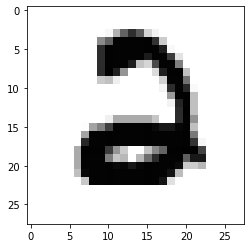

In [ ]:
plt.imshow(x[1005], cmap='gray')

In [ ]:
y = [0,1,2,3,4,5,6,7,8,9] * 500
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 

In [ ]:
y.sort()
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
y = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_test)

1000

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train.reshape(4000, -1), y_train)
pred = knn.predict(x_test.reshape(1000,-1))
pred

In [ ]:
print(pred[100:130])
print(y_test[100:130])

In [ ]:
score = knn.score(x_test.reshape(1000,-1), y_test)
score

In [ ]:
# 儲存模型
import joblib
joblib.dump(knn, 'mnist500.pkl')

In [ ]:
# 讀取模型
knn2 = joblib.load('/content/mnist500.pkl')

In [ ]:
img = plt.imread('/content/mnist500/5/5_12.bmp')
pred2 = knn2.predict(img.reshape(1, -1))
pred2

In [ ]:
#KNN完整程式碼
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib

data = []
for i in range(10):
  for j in range(1,501):
    data.append(plt.imread('mnist500/%d/%d_%d.bmp' % (i,i,j)))
x = np.array(data)
y = [0,1,2,3,4,5,6,7,8,9]*500
y = np.array(y)
y.sort()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train.reshape(4000,-1), y_train)
score = knn.score(x_test.reshape(1000,-1), y_test)
print(score)
joblib.dump(knn, 'mnist500.pkl')

## 交叉驗證與網格搜索

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors':[2,3,6,10], 'weights':['uniform', 'distance']}
gc = GridSearchCV(knn, param_grid=param, cv=5)
gc.fit(x_train.reshape(4000,-1),y_train)


In [ ]:
gc.best_params_

In [ ]:
gc.best_score_

# 單純貝氏演算法
例句：['code is easy, i like python code', 'code is too hard, i dislike python code']

In [ ]:
# 英文文句特徵處理
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data = cv.fit_transform(['code is easy, i like python code', 'code is too hard, i dislike python code'])
data

In [ ]:
data.toarray()

In [ ]:
cv.get_feature_names_out()

In [ ]:
# tf-idf文句處理
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
data = cv.fit_transform(['code is easy, i like python code', 'code is too hard, i dislike python code'])
data.toarray()

In [ ]:
# 判斷英文新聞類別
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
news = fetch_20newsgroups(subset='all')


In [ ]:
news.data

In [ ]:
news.target

In [ ]:
news.target_names

In [ ]:
len(news.target)

In [ ]:
x_train, x_txest, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2)

In [ ]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)

In [ ]:
x_test = tf.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train, y_train)


In [ ]:
score = mlt.score(x_test, y_test)
score

In [ ]:
# 判斷英文新聞類別完整程式碼
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

news = fetch_20newsgroups(subset='all')
x_train,x_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2)
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train, y_train)
score = mlt.score(x_test, y_test)
score

例句：今天台北天氣晴朗，風景區擠滿了人潮。 、 台北的天氣常常下雨。

In [ ]:
# 中文文句特徵處理
import jieba

In [ ]:
t1 = list(jieba.cut('今天台北天氣晴朗，風景區擠滿了人潮。'))
c1 = ' '.join(t1)
c1

In [ ]:
# 判斷中文新聞類別
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import jieba


In [ ]:
data = []
target = []
f = open('/content/toutiao_cat_data.txt', encoding='utf-8')
for line in f:
  linelist = line.split('_!_')
  target.append(linelist[1])
  t = list(jieba.cut(linelist[3]))
  data.append(' '.join(t))

f.close()

In [ ]:
len(target)

In [ ]:
target[67]

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train, y_train)
score = mlt.score(x_test, y_test)
score

# 線性迴歸演算法

In [ ]:
import pandas as pd
hp = pd.read_csv('/content/housePrice.csv')
hp

In [ ]:
x = hp.iloc[:, :12]
x

In [ ]:
y = hp.iloc[:, 12]
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))

In [ ]:
y_train.shape

In [ ]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
y_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_real = std_y.inverse_transform(y_test)
for i in range(10):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i]))

In [ ]:
sgd.coef_

In [ ]:
sgd.intercept_

# 邏輯迴歸演算法

In [ ]:
import pandas as pd
df = pd.read_csv("breastCancer.csv")
df

,團塊厚度,細胞大小均勻性,細胞形狀均勻性,邊緣粘附,上皮細胞大小,裸核,淡染色質,正常核仁,有絲分裂,種類
0,1,1,1,1,1,1,1,1,1,1
1,5,1,2,1,2,1,3,1,1,1
2,1,1,1,3,2,3,1,1,1,1
3,9,1,2,6,4,10,7,7,2,2
4,3,1,1,3,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
675,3,1,1,1,2,1,2,1,1,1
676,3,1,1,1,2,4,1,1,1,1
677,1,1,1,1,2,1,3,1,1,1
678,7,8,7,2,4,8,3,8,2,2


In [ ]:
x = df.iloc[:, 0:9]
x

,團塊厚度,細胞大小均勻性,細胞形狀均勻性,邊緣粘附,上皮細胞大小,裸核,淡染色質,正常核仁,有絲分裂
0,1,1,1,1,1,1,1,1,1
1,5,1,2,1,2,1,3,1,1
2,1,1,1,3,2,3,1,1,1
3,9,1,2,6,4,10,7,7,2
4,3,1,1,3,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
675,3,1,1,1,2,1,2,1,1
676,3,1,1,1,2,4,1,1,1
677,1,1,1,1,2,1,3,1,1
678,7,8,7,2,4,8,3,8,2


In [ ]:
y = df.iloc[:, 9]
y

0      1
1      1
2      1
3      2
4      1
      ..
675    1
676    1
677    1
678    2
679    1
Name: 種類, Length: 680, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
logis = LogisticRegression()
logis.fit(x_train, y_train)
score = logis.score(x_test, y_test)
score

0.9632352941176471

In [ ]:
# 召回率調整
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv("breastCancer.csv")
x = df.iloc[:, 0:9]
y = df.iloc[:, 9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
logis = LogisticRegression()
logis.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = logis.predict(x_test)
pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1])

In [ ]:
from sklearn.metrics import classification_report
ret = classification_report(y_test, pred, labels=(1,2), target_names=('良性', '惡性'))
print(ret)

              precision    recall  f1-score   support

          良性       0.98      0.99      0.98        96
          惡性       0.97      0.95      0.96        40

    accuracy                           0.98       136
   macro avg       0.98      0.97      0.97       136
weighted avg       0.98      0.98      0.98       136



In [ ]:
pred_p = logis.predict_proba(x_test)[:, 1]
pred_p

In [ ]:
pred = np.where(pred_p>0.15, 2, 1)
ret = classification_report(y_test, pred, labels=(1,2), target_names=('良性', '惡性'))
print(ret)

              precision    recall  f1-score   support

          良性       1.00      0.95      0.97        96
          惡性       0.89      1.00      0.94        40

    accuracy                           0.96       136
   macro avg       0.94      0.97      0.96       136
weighted avg       0.97      0.96      0.96       136



In [ ]:
# 召回率調整完整程式碼
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv("breastCancer.csv")
x = df.iloc[:, 0:9]
y = df.iloc[:, 9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
estimator = LogisticRegression()
estimator.fit(x_train, y_train)
#y_pre = estimator.predict(x_test)
pred_proba = estimator.predict_proba(x_test)[:, 1]
y_pre = np.where(pred_proba > 0.15, 2, 1)
ret = classification_report(y_test, y_pre, labels=(1, 2), target_names=("良性", "惡性"))
print(ret)